In [1]:
from scipy.io import loadmat
data = loadmat('/Users/youssefbenmansour/Downloads/Xtrain.mat')['Xtrain']
training_data = data[:700]

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
import numpy as np
import matplotlib.pyplot as plt

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [4]:
def create_dataset(data, time_step=100):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [5]:
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print(y_test.size)

270


In [6]:
model = Sequential()
model.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=100, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1480
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0200
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0119
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0073
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0081
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0082
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0087
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0075
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0069
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0070
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0066
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0076
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0068
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0066
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - lo

In [8]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 4800.603496468099
Root Mean Squared Error (RMSE): 69.28638752646944
Mean Absolute Error (MAE): 56.85462859686638


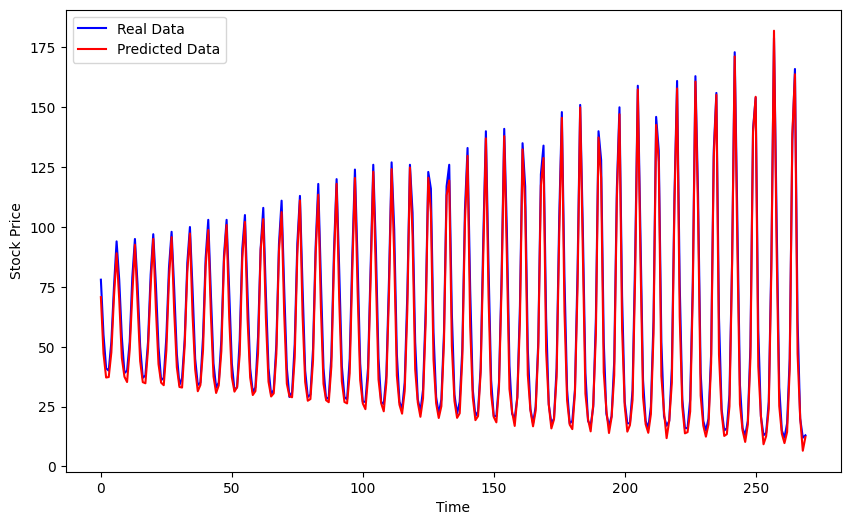

In [9]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real Data')
plt.plot(predictions, color='red', label='Predicted Data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model2 = Sequential()
model2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model2.add(LSTM(units=50, return_sequences=False))
model2.add(Dense(units=1))
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=5)

model2.compile(optimizer='adam', loss='mean_squared_error')
model2.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stop])


Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0588
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0495
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0346
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0404
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0343
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0301
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0264
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0243
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0178
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0160
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0158
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0136
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0157
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0140
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0125
E

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error (MSE): 5828.682016732918
Root Mean Squared Error (RMSE): 76.34580549534412
Mean Absolute Error (MAE): 61.857917137883135


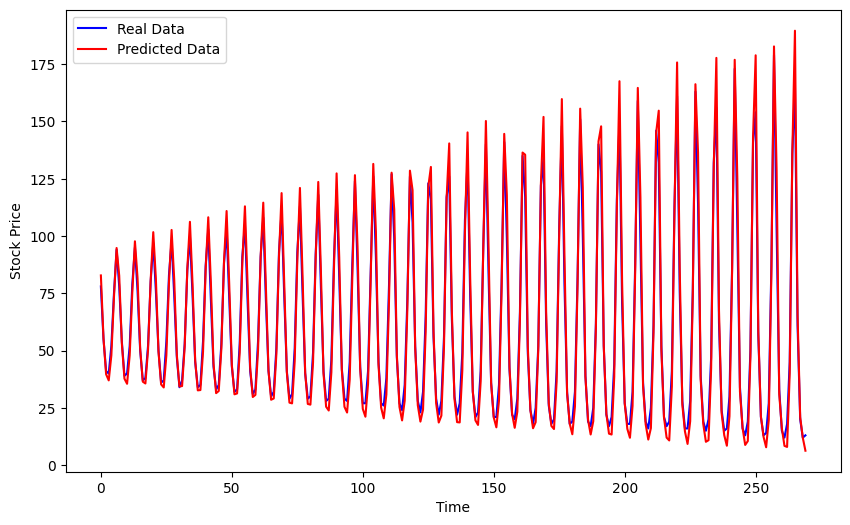

In [11]:
predictions = model2.predict(X_test)
predictions = scaler.inverse_transform(predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real Data')
plt.plot(predictions, color='red', label='Predicted Data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()